In [1]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize': (9, 6)})

In [3]:
%%time
PATH_TO_DATA = '../data/Stepic_Machine_Learning/'

event_data = pd.read_csv(os.path.join(PATH_TO_DATA, 'event_data_train.csv'))

# event_data = pd.read_csv('event_data_train.csv.gz', compression='gzip', header=0, sep=',', quotechar='"', error_bad_lines=False)

Wall time: 2.87 s


In [4]:
event_data.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [5]:
# event_data.describe()
# event_data.info()
event_data.shape

(3480703, 4)

In [6]:
event_data['action'].unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [7]:
event_data['action'].value_counts()

viewed             1830830
discovered          689495
passed              650331
started_attempt     310047
Name: action, dtype: int64

In [8]:
event_data['date'] = pd.to_datetime(event_data['timestamp'], unit='s')

In [9]:
event_data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [10]:
event_data.dtypes

step_id               int64
timestamp             int64
action               object
user_id               int64
date         datetime64[ns]
dtype: object

In [11]:
print(event_data['date'].min())
print(event_data['date'].max())

2015-06-15 04:00:48
2018-05-19 23:33:31


In [12]:
event_data['date_short'] = event_data['date'].dt.date

In [13]:
event_data.head()

,step_id,timestamp,action,user_id,date,date_short
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [14]:
# event_data['day_of_week'] = event_data['date'].dt.weekday
# event_data['day_of_week'].unique()
# event_data.drop('day_of_week', axis=1, inplace=True)

In [15]:
event_data.groupby('date_short')['user_id'].nunique().head()

date_short
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
Name: user_id, dtype: int64

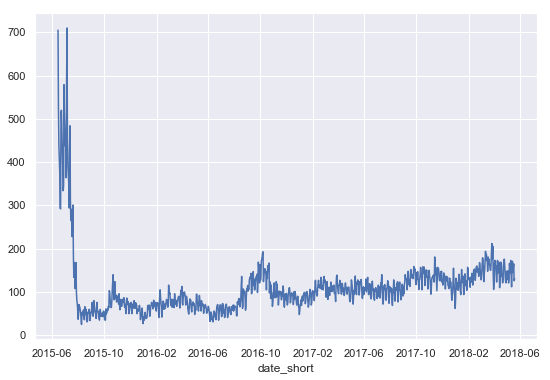

In [16]:
# plt.figure(figsize=(15, 8))
event_data.groupby('date_short')['user_id'].nunique().plot();

In [17]:
event_data[event_data['action'] == 'passed'] \
    .groupby('user_id', as_index=False) \
    .agg({'step_id': 'count'}) \
    .rename(columns={'step_id': 'passed_steps'}).head()

,user_id,passed_steps
0,2,9
1,3,87
2,5,11
3,7,1
4,8,84


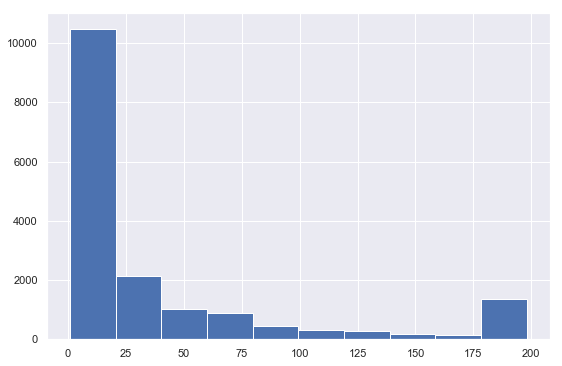

In [18]:
event_data[event_data['action'] == 'passed'] \
    .groupby('user_id', as_index=False) \
    .agg({'step_id': 'count'}) \
    .rename(columns={'step_id': 'passed_steps'})['passed_steps'].hist();

In [19]:
event_data[event_data['action'] == 'passed'] \
    .groupby('user_id', as_index=False) \
    .agg({'step_id': 'count'}) \
    .rename(columns={'step_id': 'passed_steps'})[['passed_steps']].head()
    
# event_data[event_data['action'] == 'passed'] \
#     .groupby('user_id', as_index=False)['step_id'] \
#     .agg({'passed_steps': 'count'})[['passed_steps']].head()

,passed_steps
0,9
1,87
2,11
3,1
4,84


In [20]:
# pd.pivot_table(data=event_data, index='user_id', columns='action', values='step_id', aggfunc='count', fill_value=0).head()
event_data.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count', fill_value=0).head()

action,discovered,passed,started_attempt,viewed
user_id,,,,
1,1,0,0,1
2,9,9,2,10
3,91,87,30,192
5,11,11,4,12
7,1,1,0,1


In [21]:
pd.crosstab(event_data['user_id'], event_data['action']).head()

action,discovered,passed,started_attempt,viewed
user_id,,,,
1,1,0,0,1
2,9,9,2,10
3,91,87,30,192
5,11,11,4,12
7,1,1,0,1


In [22]:
event_data.pivot_table(index='user_id', 
                       columns='action', 
                       values='step_id', 
                       aggfunc='count', 
                       fill_value=0).reset_index().head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [23]:
action_pivot_df = event_data.pivot_table(index='user_id', 
                       columns='action', 
                       values='step_id', 
                       aggfunc='count', 
                       fill_value=0).reset_index()
action_pivot_df['user_id'].nunique()

19234

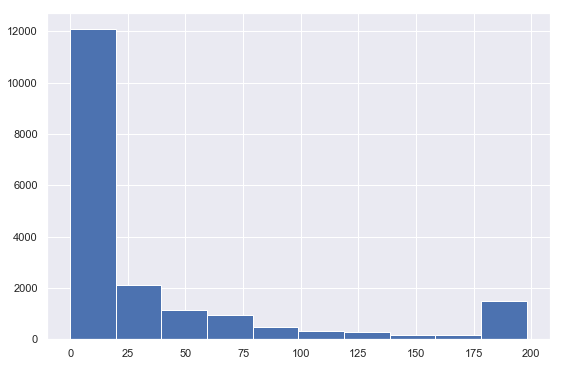

In [24]:
event_data.pivot_table(index='user_id', 
                       columns='action', 
                       values='step_id', 
                       aggfunc='count', 
                       fill_value=0).reset_index()['discovered'].hist();

## Data preprocessing

In [25]:
submissions_data = pd.read_csv(os.path.join(PATH_TO_DATA, 'submissions_data_train.csv'))

In [26]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [27]:
submissions_data['date'] = pd.to_datetime(submissions_data['timestamp'], unit='s')
submissions_data['date_short'] = submissions_data['date'].dt.date

In [28]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,date_short
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [148]:
submissions_data['user_id'].nunique()

19234

In [30]:
users_scores = pd.crosstab(submissions_data['user_id'], submissions_data['submission_status']).reset_index()

# users_scores_pivot = submissions_data.pivot_table(index='user_id', 
#                                             columns='submission_status', 
#                                             values='step_id', 
#                                             aggfunc='count', 
#                                             fill_value=0).reset_index()

# users_scores_pivot.head()
# users_scores_pivot.shape
# users_scores_pivot['user_id'].nunique()

In [32]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [33]:
users_scores['user_id'].nunique()

9940

In [34]:
################################################################################################################################

In [35]:
event_data[['user_id', 'date_short', 'timestamp']].drop_duplicates(subset=['user_id', 'date_short']).head()

,user_id,date_short,timestamp
0,17632,2015-06-15,1434340848
36,12494,2015-06-15,1434341931
59,442,2015-06-15,1434342029
62,22254,2015-06-15,1434342042
94,6646,2015-06-15,1434342230


In [36]:
event_data[['user_id', 'date_short', 'timestamp']] \
    .drop_duplicates(subset=['user_id', 'date_short']) \
    .groupby('user_id')['timestamp'].apply(list) \
    .apply(np.diff).head()

user_id
1                                                  []
2                                           [4843602]
3    [6899249, 182484, 93710, 2768870, 171400, 78712]
5                                          [33702812]
7                                                  []
Name: timestamp, dtype: object

In [37]:
gap_data = event_data[['user_id', 'date_short', 'timestamp']] \
    .drop_duplicates(subset=['user_id', 'date_short']) \
    .groupby('user_id')['timestamp'].apply(list) \
    .apply(np.diff).values

Обєднаємо всі різниці по днях в один масив для того, щоб визначити в загальному, які пропуски між днями в користувачів

In [38]:
gap_data = pd.Series(np.concatenate(gap_data, axis=0))

In [39]:
gap_data.head()

0    4843602
1    6899249
2     182484
3      93710
4    2768870
dtype: int32

Перейдем віж секунд до днів

In [40]:
gap_data = gap_data / (24 * 60 * 60)

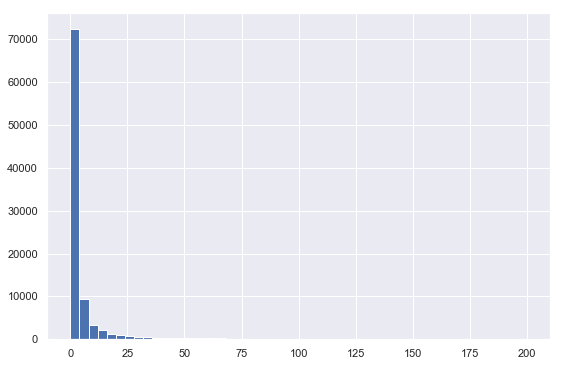

In [41]:
gap_data[gap_data < 200].hist(bins=50);

In [42]:
gap_data.quantile(.95)

59.760440972222156

95% перцентиль = 60, тобто тільки 5% користувачів повертаютсья на курс після перерви в 60 днів.

In [43]:
gap_data.quantile(.90)

18.325995370370403

In [44]:
################################################################################################################################

Якщо користувач не пройшов курс і при цьому відсутній більше 30 днів - вважаємо втраченим.

In [45]:
event_data.tail()

,step_id,timestamp,action,user_id,date,date_short
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


2018-05-19 (1526772811) - дата, яку ввжаємо крайньою

In [46]:
now = 1526772811 # 2018-05-19
drop_out_treshold = 30 * 24 * 60 * 60 # 30 днів

In [47]:
users_data = event_data.groupby('user_id', as_index=False) \
    .agg({'timestamp': 'max'}) \
    .rename(columns={'timestamp': 'last_timestamp'})

In [48]:
users_data['is_gone_user'] = (now - users_data['last_timestamp']) > drop_out_treshold

In [49]:
users_data.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [50]:
################################################################################################################################

Добавимо дані про кількість правильних сабмітів

In [51]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [52]:
# users_data = users_data.merge(users_scores, on='user_id', how='outer')
users_data = users_data.merge(users_scores, how='outer')

In [53]:
users_data = users_data.fillna(0)

In [54]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0


In [149]:
users_data.shape

(19234, 12)

In [55]:
users_events_data = event_data.pivot_table(index='user_id', 
                       columns='action', 
                       values='step_id', 
                       aggfunc='count', 
                       fill_value=0).reset_index()

In [56]:
users_events_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [57]:
users_data = users_data.merge(users_events_data, how='outer')

In [58]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,1,0,0,1
1,2,1519226966,True,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,11,11,4,12
4,7,1521634660,True,0.0,0.0,1,1,0,1


Скільки унікальних днів користусач був на сайті

In [59]:
# users_days = event_data.groupby('user_id')[['date_short']].nunique().reset_index()
users_days = event_data.groupby('user_id')['date_short'].nunique().to_frame().reset_index()

In [60]:
users_days.head()

,user_id,date_short
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1


In [61]:
users_data = users_data.merge(users_days, how='outer')

In [62]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,date_short
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1


In [63]:
users_data = users_data.rename(columns={'date_short': 'n_unique_days'})

In [64]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,n_unique_days
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1


Порівнюємо кількість користувачів після всіх перевторень з оригінальним.

In [65]:
users_data['user_id'].nunique()

19234

In [66]:
event_data['user_id'].nunique()

19234

Чи успішно завершив курс - набрав більше 175 балів.

In [67]:
users_data['passed_course'] = users_data['passed'] > 170

In [68]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,n_unique_days,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False


In [69]:
users_data.groupby('passed_course').count()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,n_unique_days
passed_course,,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [70]:
round((1425 / 17809 * 100), 3)

8.002

In [71]:
################################################################################################################################

Задача, визначити чи користувач покине курси по даним за перші n-днів. Для цього проаналізуємо поведінку користувача за перші дні.

In [72]:
# users_data[users_data.passed_course].n_unique_days.median()
# users_data[users_data.passed_course == True].n_unique_days.median()
# users_data[users_data['passed_course'] == True].n_unique_days.median()
users_data[users_data['passed_course'] == True]['n_unique_days'].median()

20.0

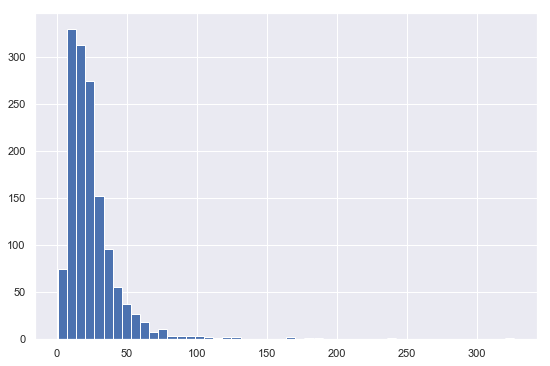

In [73]:
users_data[users_data['passed_course'] == True]['n_unique_days'].hist(bins=50);

#### Припускаємо, що на передбачення churn вистачить інформації по користувачу за 3 дні.

In [74]:
event_data.head()

,step_id,timestamp,action,user_id,date,date_short
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [75]:
user_min_time = event_data.groupby('user_id', as_index=False) \
    .agg({'timestamp': 'min'}) \
    .rename({'timestamp': 'min_timestamp'}, axis=1)

In [76]:
user_min_time.head()

,user_id,min_timestamp
0,1,1472827464
1,2,1514383364
2,3,1434358476
3,5,1466156809
4,7,1521634660


In [77]:
users_data = users_data.merge(user_min_time, how='outer')

In [78]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,n_unique_days,passed_course,min_timestamp
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False,1472827464
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False,1514383364
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False,1434358476
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False,1466156809
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False,1521634660


In [79]:
# event_data_train = pd.DataFrame()
# for user_id in users_data.user_id:
#     min_user_time = users_data[users_data.user_id == user_id].min_timestamp.item()
#     time_treshold = min_user_time + 3 * 24 * 60 * 60
    
#     user_events_data = event_data[(event_data.user_id == user_id) & (event_data.timestamp < time_treshold)]
    
#     event_data_train = event_data_train.append(user_events_data)
    
#     break
    
# event_data_train

Відібрати для кожного користувача тільки ті події, які відбулись в проміжу 3 днів від першого заходу

In [80]:
event_data['user_time'] = event_data['user_id'].map(str) + '_' + event_data['timestamp'].map(str)

In [81]:
# event_data_train = event_data
event_data.head()

,step_id,timestamp,action,user_id,date,date_short,user_time
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895


In [82]:
learning_time_treshold = 3 * 24 * 60 * 60
learning_time_treshold

259200

In [83]:
user_min_time.head()

,user_id,min_timestamp
0,1,1472827464
1,2,1514383364
2,3,1434358476
3,5,1466156809
4,7,1521634660


In [84]:
user_learning_time_treshold = user_min_time['user_id'].map(str) + '_' + (user_min_time['min_timestamp'] + learning_time_treshold).map(str)

In [85]:
user_learning_time_treshold.head()

0    1_1473086664
1    2_1514642564
2    3_1434617676
3    5_1466416009
4    7_1521893860
dtype: object

In [86]:
user_min_time['user_learning_time_treshold'] = user_learning_time_treshold

In [87]:
event_data.shape

(3480703, 7)

In [88]:
event_data = event_data.merge(user_min_time[['user_id', 'user_learning_time_treshold']], how='outer')

In [89]:
event_data.shape

(3480703, 8)

In [90]:
event_data.head()

,step_id,timestamp,action,user_id,date,date_short,user_time,user_learning_time_treshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048


In [91]:
event_data_train = event_data[event_data['user_time'] <= event_data['user_learning_time_treshold']]

In [92]:
event_data_train.head()

,step_id,timestamp,action,user_id,date,date_short,user_time,user_learning_time_treshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048


#### Задача 1

В процессе решения одной аналитической задачи очень часто замечаешь и другие задачи, связанные с исследуемым вопросом. В свое время, работая над предсказанием оттока студентов со stepik, я многое изменил в структуре своих курсов. 

Тогда я нашел довольно интересную закономерность прохождения онлайн курсов. Слушатели онлайн курсов очень негативно реагируют на невозможность решить задачу, иными словами, если студент застрял на определенном шаге, то он, с высокой вероятность, вообще бросит курс, чем просто пропустит этот шаг и продолжит обучение. 

Давайте найдем такой стэп, используя данные о сабмитах. Для каждого пользователя найдите такой шаг, который он не смог решить, и после этого не пытался решать другие шаги. Затем найдите id шага,  который стал финальной точкой практического обучения на курсе для максимального числа пользователей. 

То есть мы исследуем следующий сценарий: человек решает стэп, не может получить правильный ответ и больше не возвращается к практическим задачам. Что это за шаг такой, который отпугнул максимальное число пользователей?

In [93]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,date_short
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [94]:
submissions_data['submission_status'].value_counts()

wrong      286399
correct    222705
Name: submission_status, dtype: int64

In [95]:
submissions_data[submissions_data['submission_status'] == 'wrong'] \
    .groupby('step_id', as_index=False)[['user_id']] \
    .count().sort_values(by='user_id', ascending=False) \
    .rename(columns={'user_id': 'step_id_count'}).head()

,step_id,step_id_count
4,31978,16084
11,32031,13373
19,32202,13002
44,33481,10300
12,32075,10003


In [96]:
submissions_data.loc[submissions_data.reset_index().groupby(['user_id'])['timestamp'].idxmax()] \
                .query('submission_status == "wrong"') \
                .groupby(['step_id']) \
                .count() \
                .sort_values('user_id', ascending=False) \
                .head()

,timestamp,submission_status,user_id,date,date_short
step_id,,,,,
31978,154,154,154,154,154
32812,133,133,133,133,133
32031,97,97,97,97,97
32202,92,92,92,92,92
33481,78,78,78,78,78


In [97]:
df = submissions_data

# Создаем колонку с датой последней активности
df = df.set_index('user_id')
df['last_timestamp'] = df.groupby('user_id')['timestamp'].max().astype('int64')

# Отбираем только последнюю активность
df = df[df['timestamp'] == df['last_timestamp']]

# смотрим чтобы у нее был статус 'wrong'
df = df[df['submission_status'] == 'wrong']

# отбираем самый "популярный" степ
df.groupby('step_id', as_index=False)[['submission_status']] \
    .count().sort_values('submission_status', ascending=False).head()

,step_id,submission_status
4,31978,154
28,32812,133
11,32031,97
19,32202,92
42,33481,78


In [98]:
################################################################################################################################

Коротший варіант відібору для кожного користувача тільки тих подій, які відбулись в проміжу 3 днів від першого заходу

In [99]:
# learning_time_treshold = 3 * 24 * 60 * 60
# users_data['min_plus_3days'] = users_data['min_timestamp'] + learning_time_treshold
# users_data_3 = users_data[['user_id', 'min_plus_3days']]
# users_data.drop('min_plus_3days', axis=1, inplace=True)
# users_data_3.head()

# events_data_3 = event_data.merge(users_data_3, on='user_id', how='outer')
# events_data_3_left = events_data_3[events_data_3['timestamp'] < events_data_3['min_plus_3days']]
# events_data_3_left.head()

In [100]:
event_data_train.groupby('user_id')['date_short'].nunique().max()

4

Поріг у 3 дні може дати значення 4, якщо користувач почав в обід

In [101]:
submissions_data['user_time'] = submissions_data['user_id'].map(str) + '_' + submissions_data['timestamp'].map(str)
submissions_data = submissions_data.merge(user_min_time[['user_id', 'user_learning_time_treshold']], how='outer')
submissions_data_train = submissions_data[submissions_data['user_time'] <= submissions_data['user_learning_time_treshold']]
submissions_data_train.groupby('user_id')['date_short'].nunique().max()

4

In [102]:
X = submissions_data_train.groupby('user_id')['date_short'].nunique().to_frame().reset_index()

In [103]:
X.head()

,user_id,date_short
0,2,1
1,3,1
2,8,1
3,14,1
4,16,3


Порахуємо скільки унікальних степів зробив користувач за перші 3 дня

In [104]:
step_tried = submissions_data_train.groupby('user_id')['step_id'].nunique().to_frame().reset_index() \
    .rename(columns={'step_id': 'steps_tried'})

In [105]:
# step_tried.head()

In [106]:
X = X.merge(step_tried, on='user_id', how='outer')

In [107]:
X.rename(columns={'date_short': 'days'}, inplace=True)

In [108]:
X.head()

,user_id,days,steps_tried
0,2,1,2
1,3,1,4
2,8,1,11
3,14,1,1
4,16,3,23


In [109]:
X = X.merge(submissions_data_train.pivot_table(index='user_id', 
                                               columns='submission_status', 
                                               values='step_id', 
                                               aggfunc='count', 
                                               fill_value=0).reset_index())

In [110]:
X.head()

,user_id,days,steps_tried,correct,wrong
0,2,1,2,2,0
1,3,1,4,4,4
2,8,1,11,9,21
3,14,1,1,0,1
4,16,3,23,23,27


In [111]:
X['correct_ratio'] = X['correct'] / (X['correct'] + X['wrong'])

In [112]:
X.head()

,user_id,days,steps_tried,correct,wrong,correct_ratio
0,2,1,2,2,0,1.00
1,3,1,4,4,4,0.50
2,8,1,11,9,21,0.30
3,14,1,1,0,1,0.00
4,16,3,23,23,27,0.46


In [113]:
X = X.merge(event_data_train.pivot_table(index='user_id', 
                                         columns='action', 
                                         values='step_id', 
                                         aggfunc='count', 
                                         fill_value=0).reset_index()[['user_id', 'viewed']], how='outer')

In [114]:
X.head()

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed
0,2,1.0,2.0,2.0,0.0,1.00,9
1,3,1.0,4.0,4.0,4.0,0.50,20
2,8,1.0,11.0,9.0,21.0,0.30,154
3,14,1.0,1.0,0.0,1.0,0.00,9
4,16,3.0,23.0,23.0,27.0,0.46,132


In [115]:
X = X.fillna(0)

In [116]:
X = X.merge(users_data[['user_id', 'passed_course', 'is_gone_user']], how='outer')

In [117]:
X.head()

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed,passed_course,is_gone_user
0,2,1.0,2.0,2.0,0.0,1.00,9,False,True
1,3,1.0,4.0,4.0,4.0,0.50,20,False,True
2,8,1.0,11.0,9.0,21.0,0.30,154,False,True
3,14,1.0,1.0,0.0,1.0,0.00,9,False,True
4,16,3.0,23.0,23.0,27.0,0.46,132,True,True


Всі користувачі, які не дішли до кінця курсу і не кинули курс

In [118]:
# X[(X['is_gone_user'] == False) & (X['passed_course'] == False)]

Нам потрібно навпаки (пройшов курс або вже кінув курс)

In [119]:
X = X[~((X['is_gone_user'] == False) & (X['passed_course'] == False))]

In [120]:
X.head()

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed,passed_course,is_gone_user
0,2,1.0,2.0,2.0,0.0,1.00,9,False,True
1,3,1.0,4.0,4.0,4.0,0.50,20,False,True
2,8,1.0,11.0,9.0,21.0,0.30,154,False,True
3,14,1.0,1.0,0.0,1.0,0.00,9,False,True
4,16,3.0,23.0,23.0,27.0,0.46,132,True,True


In [121]:
X.shape

(17985, 9)

In [122]:
X.groupby(['passed_course', 'is_gone_user'])['user_id'].count()

passed_course  is_gone_user
False          True            16560
True           False             141
               True             1284
Name: user_id, dtype: int64

In [123]:
X = X.set_index(X['user_id'])
X = X.drop('user_id', axis=1)

In [124]:
y = X['passed_course'].map(int)

In [125]:
X = X.drop(['passed_course', 'is_gone_user'], axis=1)

In [126]:
X.head()

,days,steps_tried,correct,wrong,correct_ratio,viewed
user_id,,,,,,
2,1.0,2.0,2.0,0.0,1.00,9
3,1.0,4.0,4.0,4.0,0.50,20
8,1.0,11.0,9.0,21.0,0.30,154
14,1.0,1.0,0.0,1.0,0.00,9
16,3.0,23.0,23.0,27.0,0.46,132


In [127]:
y.head()

user_id
2     0
3     0
8     0
14    0
16    1
Name: passed_course, dtype: int64

In [128]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [130]:
%%time
dt = DecisionTreeClassifier()
# params = {'max_depth': range(1, 11), 
#           'min_samples_split': range(2, 11), 
#           'min_samples_leaf': range(1, 11)}
params = {'max_depth': range(1, 5)}
search = GridSearchCV(dt, params, cv=5)
search.fit(X_train, y_train)

Wall time: 241 ms


In [131]:
search.best_params_

{'max_depth': 3}

In [132]:
best_tree = search.best_estimator_

In [133]:
y_pred = best_tree.predict(X_test)

In [134]:
search.score(X_train, y_train)

0.9192151878624196

In [135]:
search.score(X_test, y_test)

0.9292068198665678

In [136]:
precision_score(y_test, y_pred)

0.49624060150375937

In [137]:
recall_score(y_test, y_pred)

0.1732283464566929

In [138]:
accuracy_score(y_test, y_pred)

0.9292068198665678

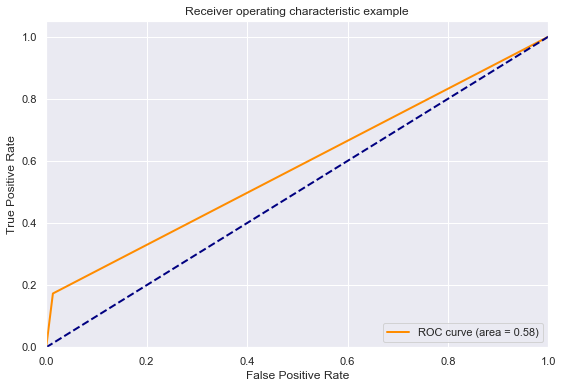

In [139]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc= auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.axvline(x=0.5, color='k', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [140]:
y_pred_proba = best_tree.predict_proba(X_test)
y_pred_proba

array([[0.91993186, 0.08006814],
       [0.96805631, 0.03194369],
       [0.96805631, 0.03194369],
       ...,
       [0.98664501, 0.01335499],
       [0.91993186, 0.08006814],
       [0.83723404, 0.16276596]])

In [141]:
y_pred = np.where(y_pred_proba[:, 1] > 0.8, 1, 0)
print('precision = {:.5f}'.format(precision_score(y_test, y_pred))) # precision став вищий
print('recall = {:.5f}'.format(recall_score(y_test, y_pred))) # recall став нижчий
print('accuracy = {:.5f}'.format(accuracy_score(y_test, y_pred))) # accuracy стало вище

precision = 0.75000
recall = 0.02362
accuracy = 0.93050


## Stepik ML contest

Задача нам уже знакома - нужно предсказать, сможет ли пользователь успешно закончить онлайн курс Анализ данных в R.

Мы будем считать, что пользователь успешно закончил курс, если он правильно решил больше 40 практических заданий (больше 40 баллов).

В данных:
- submission_data_test.csv
- events_data_test.csv

хранится информация о решениях и действиях для 6184 студентов за первые два дня прохождения курса. Это 6184 студентов, которые проходили курс в период с мая 2018 по январь 2019.

Используя данные о первых двух днях активности на курсе вам нужно предсказать, наберет ли пользователь более 40 баллов на курсе или нет.

В этих данных, вам доступны только первые дня активности студентов для того, чтобы сделать предсказание. На самом деле, используя эти данные, вы уже можете сделать прогноз. Например, если пользователь за первые два дня набрал 40 баллов, скорее всего он наберет более 40 баллов в дальнейшем. Чтобы подкрепить такие гипотезы, вы можете использовать данные, на которые мы исследовали в первых двух модулях курса, где для всех пользователей представлены все данные об их активности на курсе. 

### test data

In [142]:
events_data_test = pd.read_csv(os.path.join(PATH_TO_DATA, 'events_data_test.csv'))
events_data_test.head()

,step_id,timestamp,action,user_id
0,30456,1526893787,viewed,24417
1,30456,1526893797,viewed,24417
2,30456,1526893954,viewed,24417
3,30456,1526895780,viewed,24417
4,30456,1526893787,discovered,24417


In [150]:
events_data_test.shape

(274768, 4)

In [152]:
events_data_test['user_id'].nunique()

6184

In [158]:
events_data_test['action'].value_counts()

viewed             118276
discovered          67268
passed              62357
started_attempt     26867
Name: action, dtype: int64

In [143]:
submission_data_test = pd.read_csv(os.path.join(PATH_TO_DATA, 'submission_data_test.csv'))
submission_data_test.head()

,step_id,timestamp,submission_status,user_id
0,31971,1526800961,wrong,24370
1,31971,1526800976,wrong,24370
2,31971,1526800993,wrong,24370
3,31971,1526801054,correct,24370
4,31972,1526800664,wrong,24370


In [151]:
submission_data_test.shape

(42261, 4)

In [153]:
submission_data_test['user_id'].nunique()

2803

In [156]:
submission_data_test['submission_status'].value_counts()

wrong      21186
correct    21075
Name: submission_status, dtype: int64

In [190]:
submission_data_test_pivot_user_id_submission_status = pd.crosstab(submissions_data['user_id'], 
                                                                   submissions_data['submission_status']).reset_index()

In [192]:
submission_data_test_pivot_user_id_submission_status[submission_data_test_pivot_user_id_submission_status['correct'] >= 40].count()

submission_status
user_id    2013
correct    2013
wrong      2013
dtype: int64

### train data

In [208]:
event_data.head()

,step_id,timestamp,action,user_id,date,date_short,user_time,user_learning_time_treshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048


In [209]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,date_short,user_time,user_learning_time_treshold
0,31971.0,1.434349e+09,correct,15853,2015-06-15 06:21:15,2015-06-15,15853_1434349275,15853_1434605177
1,31972.0,1.434348e+09,correct,15853,2015-06-15 06:05:00,2015-06-15,15853_1434348300,15853_1434605177
2,31972.0,1.478852e+09,wrong,15853,2016-11-11 08:15:49,2016-11-11,15853_1478852149,15853_1434605177
3,31972.0,1.478852e+09,correct,15853,2016-11-11 08:16:04,2016-11-11,15853_1478852164,15853_1434605177
4,31976.0,1.434348e+09,wrong,15853,2015-06-15 06:02:03,2015-06-15,15853_1434348123,15853_1434605177


In [146]:
event_data['user_id'].nunique()

19234

In [147]:
submissions_data['user_id'].nunique()

19234

In [159]:
users_scores = pd.crosstab(submissions_data['user_id'], submissions_data['submission_status']).reset_index()

In [160]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [177]:
users_scores[users_scores['correct'] > 40].count()

submission_status
user_id    1968
correct    1968
wrong      1968
dtype: int64

In [178]:
users_scores['user_id'].nunique()

9940

In [184]:
submissions_data_id = submissions_data[['user_id']].sort_values('user_id'). \
    drop_duplicates(subset=['user_id']). \
    reset_index().drop('index', axis=1)
    
submissions_data_id.head()

,user_id
0,1
1,2
2,3
3,5
4,7


In [185]:
submissions_data_id['user_id'].nunique()

19234

In [186]:
X_train = submissions_data_id.merge(users_scores, how='outer', on='user_id')

In [188]:
X_train = X_train.fillna(0)

In [189]:
X_train.head()

,user_id,correct,wrong
0,1,0.0,0.0
1,2,2.0,0.0
2,3,29.0,23.0
3,5,2.0,2.0
4,7,0.0,0.0


In [200]:
X_train['passed'] = np.where(X_train['correct'] > 40, 1, 0)
X_train['passed'].value_counts()

0    17266
1     1968
Name: passed, dtype: int64

In [202]:
X_train = X_train.drop(['correct', 'wrong'], axis=1)
X_train.head()

,user_id,passed
0,1,0
1,2,0
2,3,0
3,5,0
4,7,0
